# Playing with the NEAT algorithm I designed

In [1]:
%matplotlib inline

# Import libraries
import numpy as np
import gym
import random
import matplotlib.pyplot as plt
import copy
import time

## Import NEAT algorithm

In [2]:
from NEAT import NEAT_wrapper as NEAT

## Play cartpole

### Train algorithm

Iteration  0 / 19


C:\Users\Hippolyte Moulle\Anaconda3\lib\site-packages\gym\logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


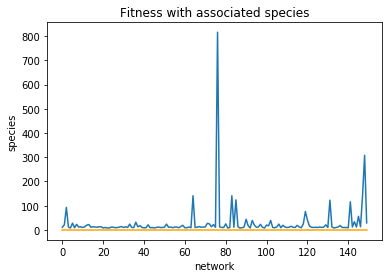

Iteration  1 / 19


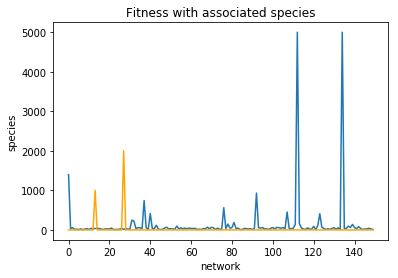

Iteration  2 / 19


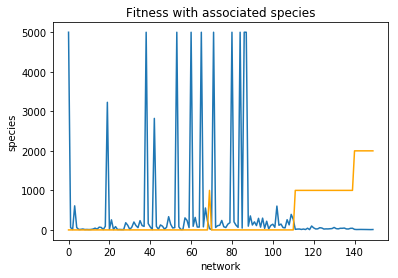

Iteration  3 / 19


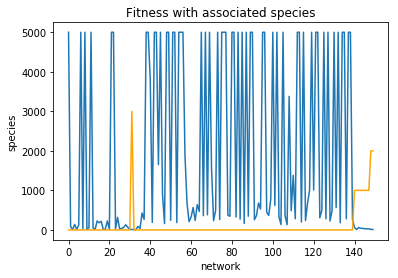

Iteration  4 / 19


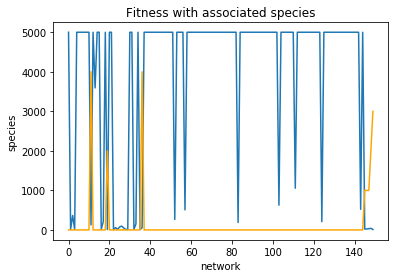

Iteration  5 / 19


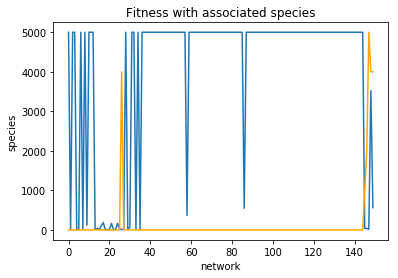

Iteration  6 / 19


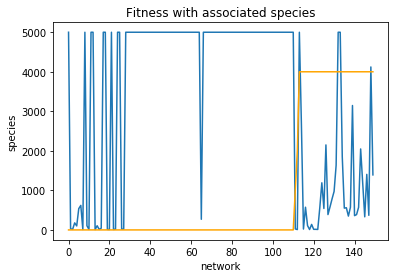

Iteration  7 / 19


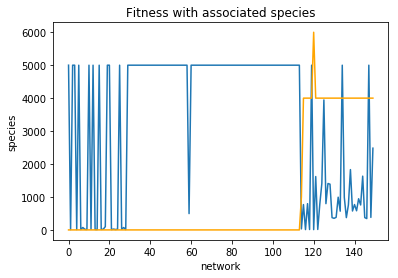

Iteration  8 / 19


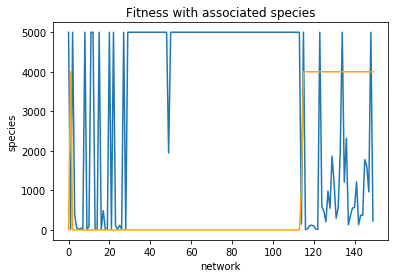

Iteration  9 / 19


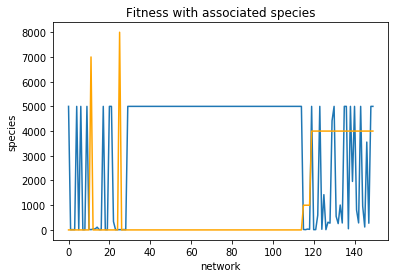

Iteration  10 / 19


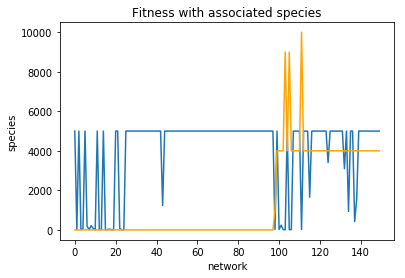

Iteration  11 / 19


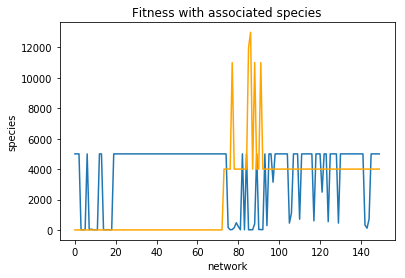

Iteration  12 / 19


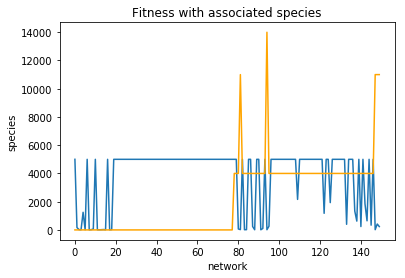

Iteration  13 / 19


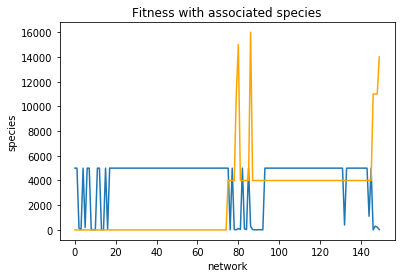

Iteration  14 / 19


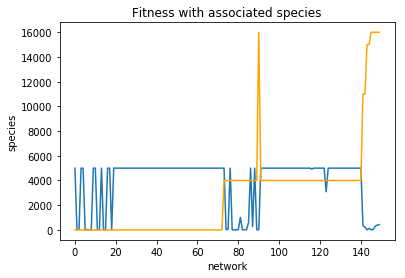

Iteration  15 / 19


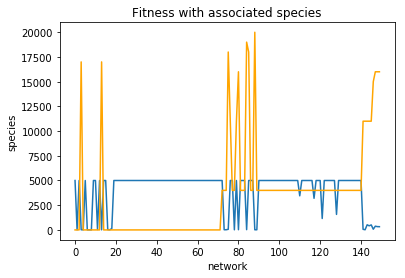

Iteration  16 / 19


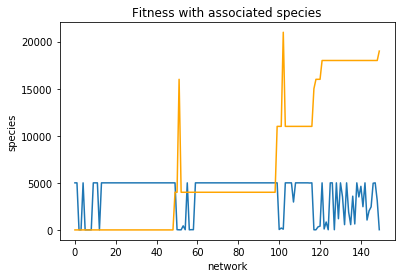

Iteration  17 / 19


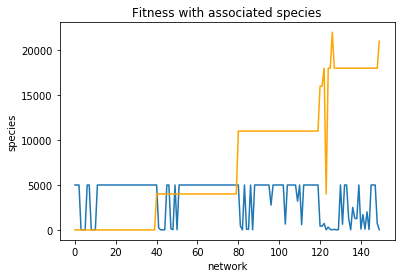

Iteration  18 / 19


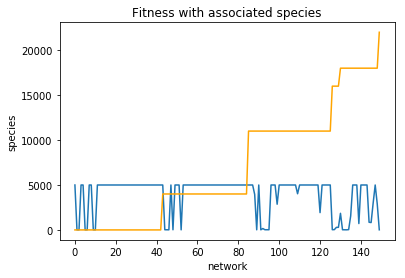

Iteration  19 / 19


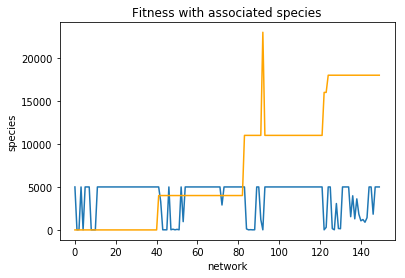

In [3]:
# Create population
num_nets = 150
n_inputs = 4
n_outputs = 1
neat = NEAT(num_nets=num_nets, n_inputs=n_inputs, n_outputs=n_outputs)

# Define environment
env = gym.make('CartPole-v0')

# Time of each trial
T = 5000

# Number of iterations for NEAT
epochs = 20
neat.max_shit_gen = epochs + 1 # Update this so that good species do not disappear if there is a fitness limit that cannot be crossed

# Outputs
species = np.zeros((num_nets, epochs))
fitness = np.zeros((num_nets, epochs))

# Loop over iterations
for epi in range(epochs):
    
    # Save species
    species[:, epi] = neat.species()
    
    # Loop over number of agents
    for n in range(num_nets):
        # Reset environment
        env.reset()
        # Loop over number of time steps
        for t in range(T):

            # Which action ?
            if t == 0:
                action = env.action_space.sample()
            else:
                #action = np.argmax(neat.action(n, observation))
                action = int(np.round(neat.action(n, observation)))
            # Take action
            observation, reward, _, _ = env.step(action) # take a random action
            # Break if no reward anymore
            if reward == 0:
                break
            else:
                fitness[n, epi] += 1 # otherwise add a reward
    
    # Plot fitness
    print("Iteration ", epi, "/", epochs-1)
    plt.plot(fitness[:, epi])
    plt.plot(species[:, epi]*1000, color='orange')
    plt.title('Fitness with associated species')
    plt.xlabel('network')
    plt.ylabel('species')
    plt.show()

    # Modify NEAT if it is not the last generation
    if epi < epochs-1:
        neat.next_gen(fitness[:, epi])
        

### Display evolution of species across training

Text(0, 0.5, 'percentage per species')

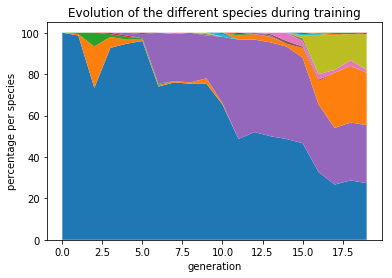

In [4]:
# Number of individuals per species along training
max_spec = int(np.max(species))+1
species_all = np.zeros((species.shape[1], max_spec))
for spec in range(max_spec):
    species_all[:, spec] = np.sum(species==spec, axis=0)
species_all = species_all / species.shape[0] * 100 # normalize number of individuals

# Stackplot to visualize evolution of species
plt.stackplot(np.arange(epochs), species_all.T)
plt.title("Evolution of the different species during training")
plt.xlabel("generation")
plt.ylabel("percentage per species")

### Launch simulation

In [5]:
# Reset environment
env.reset()
# Loop over number of time steps
T = 1000
for t in range(T):
    # Display game
    env.render()
    # Which action?
    if t == 0:
        action = env.action_space.sample()
    else:
        action = int(np.round(neat.neat.networks[np.argmax(fitness[:, -1])].update(observation)))
    # Take action
    observation, reward, _, _ = env.step(action) # take a random action
    # Break if no reward anymore
    if reward == 0:
        break
# Close game
env.close()

## Ok let's play another game: acrobot

### Train algorithm

Iteration  0 / 19


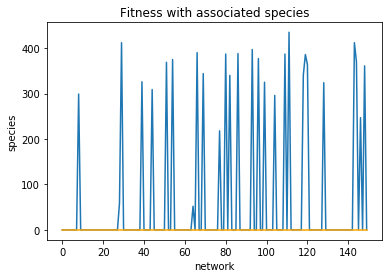

Iteration  1 / 19


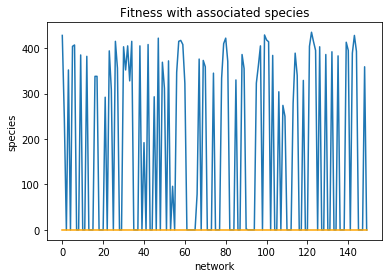

Iteration  2 / 19


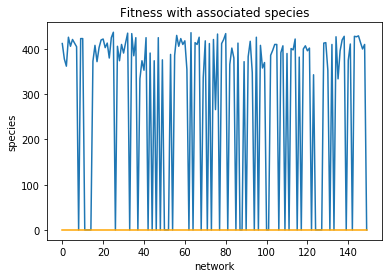

Iteration  3 / 19


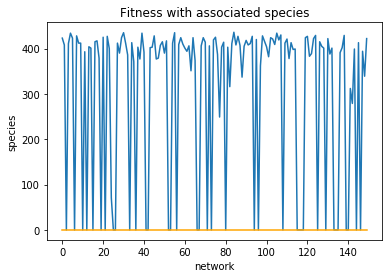

Iteration  4 / 19


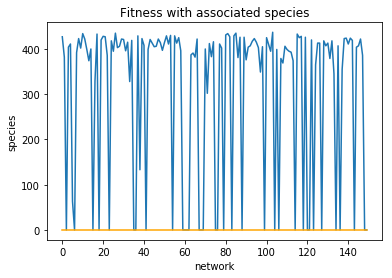

C:\Users\Hippolyte Moulle\Documents\GitHub\AndrewNG_programs\3.ReinforcementLearning\NEAT_algorithm\NEAT.py:80: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-4.9*x))


Iteration  5 / 19


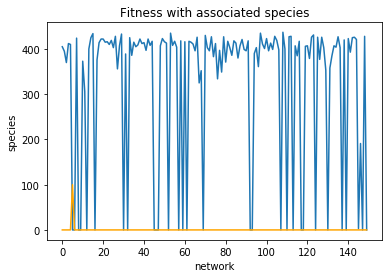

Iteration  6 / 19


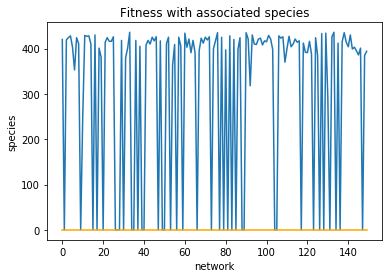

Iteration  7 / 19


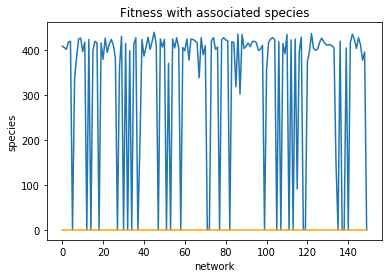

Iteration  8 / 19


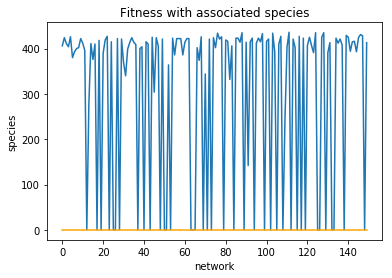

Iteration  9 / 19


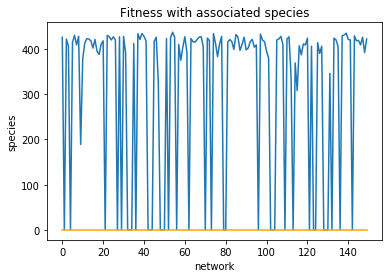

Iteration  10 / 19


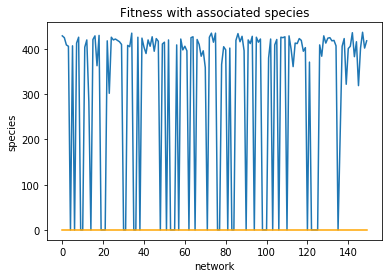

Iteration  11 / 19


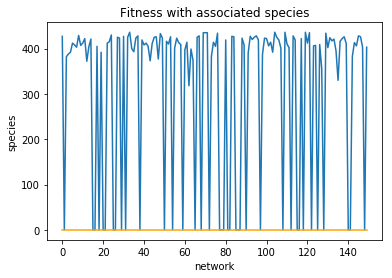

Iteration  12 / 19


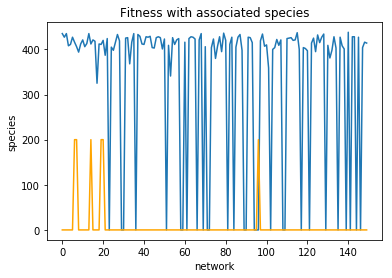

Iteration  13 / 19


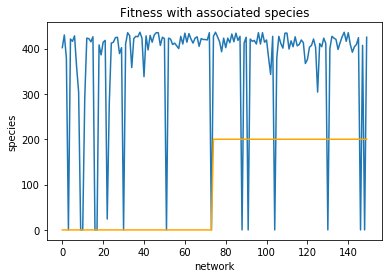

Iteration  14 / 19


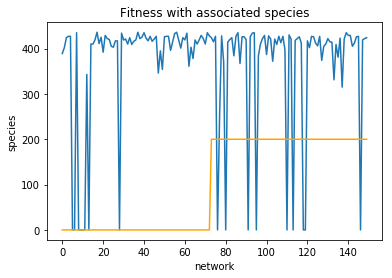

Iteration  15 / 19


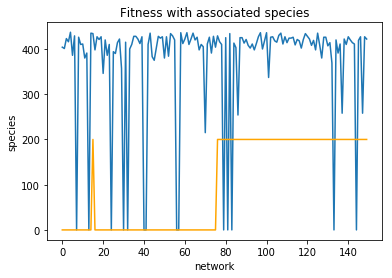

Iteration  16 / 19


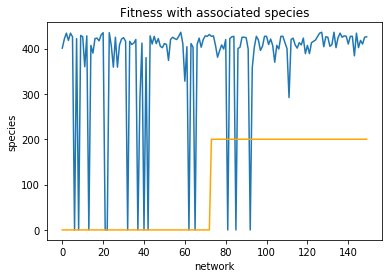

Iteration  17 / 19


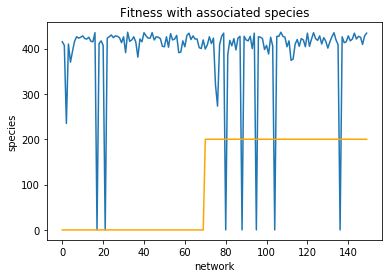

Iteration  18 / 19


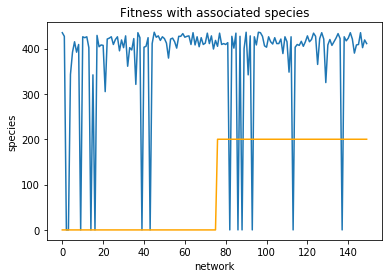

Iteration  19 / 19


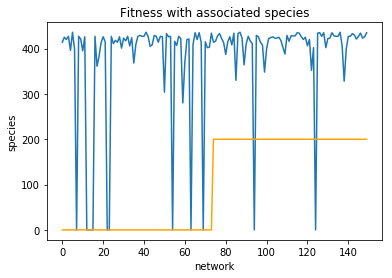

In [6]:
# Create population
num_nets = 150
n_inputs = 6
n_outputs = 3
neat = NEAT(num_nets=num_nets, n_inputs=n_inputs, n_outputs=n_outputs)

# Define environment
env = gym.make('Acrobot-v1')

# Time of each trial
T = 500

# Number of iterations for NEAT
epochs = 20
neat.max_shit_gen = epochs + 1 # Update this so that good species do not disappear if there is a fitness limit that cannot be crossed

# Outputs
species = np.zeros((num_nets, epochs))
fitness = np.zeros((num_nets, epochs)) + T # we want positive fitnesses, and here reward is -1 as long as objective is not reached

# Loop over iterations
for epi in range(epochs):
    
    # Save species
    species[:, epi] = neat.species()
    
    # Loop over number of agents
    for n in range(num_nets):
        # Reset environment
        env.reset()
        # Loop over number of time steps
        for t in range(T):

            # Which action ?
            if t == 0:
                action = env.action_space.sample()
            else:
                #action = np.argmax(neat.action(n, observation))
                action = np.argmax(neat.action(n, observation))
            # Take action
            observation, reward, _, _ = env.step(action) # take a random action
            # Break if no reward anymore
            if reward == 0:
                break
            else:
                fitness[n, epi] += reward # otherwise add a reward
    
    # Plot fitness
    print("Iteration ", epi, "/", epochs-1)
    plt.plot(fitness[:, epi])
    plt.plot(species[:, epi]*100, color='orange')
    plt.title('Fitness with associated species')
    plt.xlabel('network')
    plt.ylabel('species')
    plt.show()

    # Modify NEAT if it is not the last generation
    if epi < epochs-1:
        neat.next_gen(fitness[:, epi])
        

### Display evolution of species across training

Text(0, 0.5, 'percentage per species')

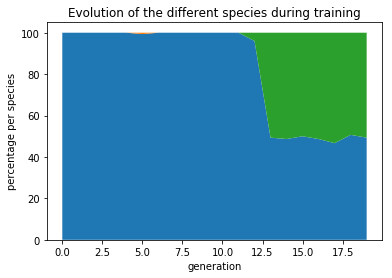

In [7]:
# Number of individuals per species along training
max_spec = int(np.max(species))+1
species_all = np.zeros((species.shape[1], max_spec))
for spec in range(max_spec):
    species_all[:, spec] = np.sum(species==spec, axis=0)
species_all = species_all / species.shape[0] * 100 # normalize number of individuals

# Stackplot to visualize evolution of species
plt.stackplot(np.arange(epochs), species_all.T)
plt.title("Evolution of the different species during training")
plt.xlabel("generation")
plt.ylabel("percentage per species")

### Launch simulation

In [8]:
# Reset environment
env.reset()
# Loop over number of time steps
T = 1000
for t in range(T):
    # Display game
    env.render()
    # Which action?
    if t == 0:
        action = env.action_space.sample()
    else:
        action = np.argmax(neat.neat.networks[np.argmax(fitness[:, -1])].update(observation))
    # Take action
    observation, reward, _, _ = env.step(action) # take a random action
    # Break if no reward anymore
    if reward == 0:
        break
    # Wait for a while cause it's too fast
    time.sleep(0.1)
# Close game
env.close()

## Mountain car

Iteration  0 / 99


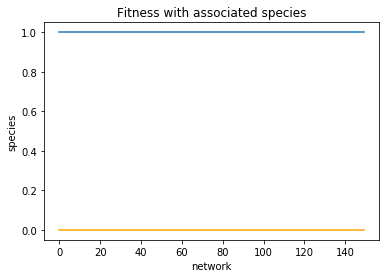

Iteration  1 / 99


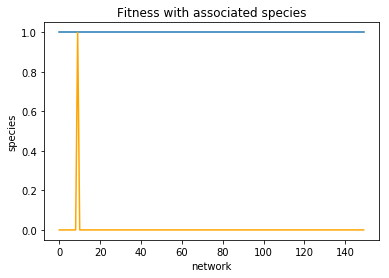

Iteration  2 / 99


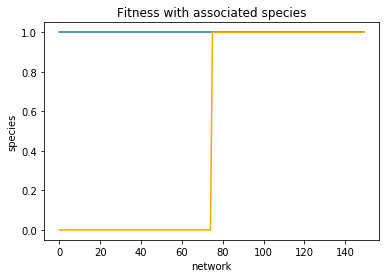

Iteration  3 / 99


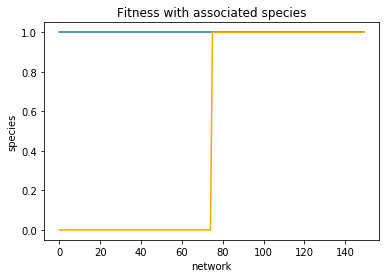

Iteration  4 / 99


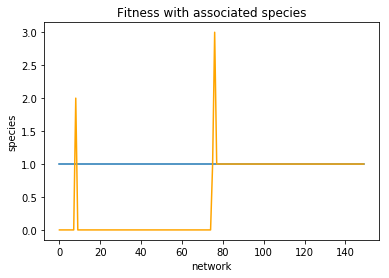

Iteration  5 / 99


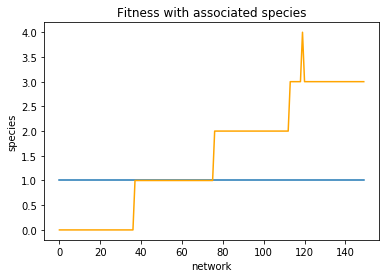

Iteration  6 / 99


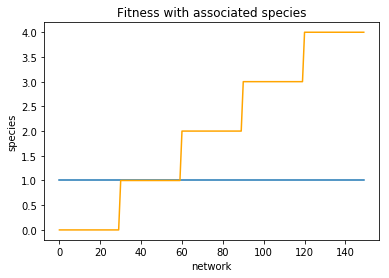

Iteration  7 / 99


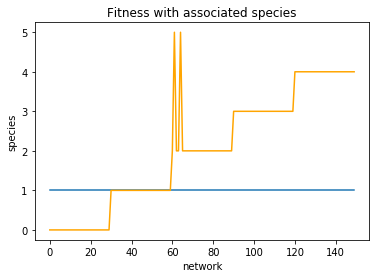

Iteration  8 / 99


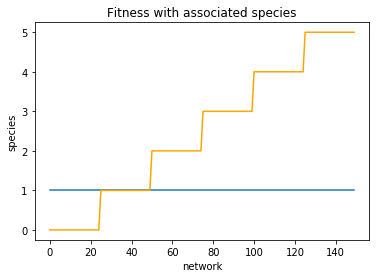

Iteration  9 / 99


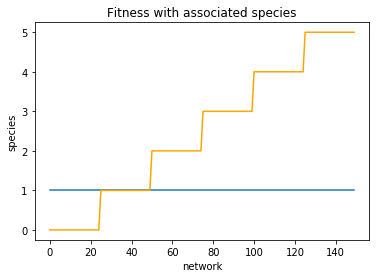

Iteration  10 / 99


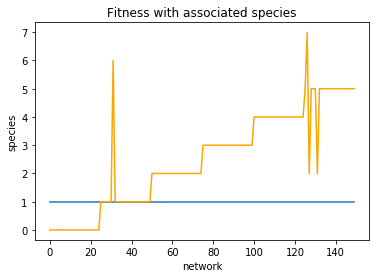

Iteration  11 / 99


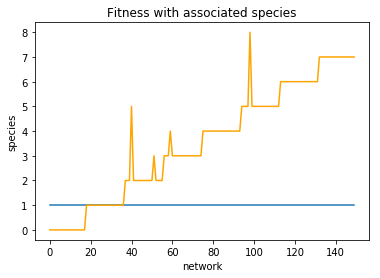

Iteration  12 / 99


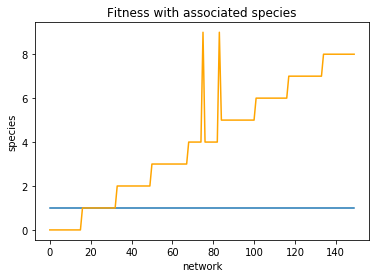

Iteration  13 / 99


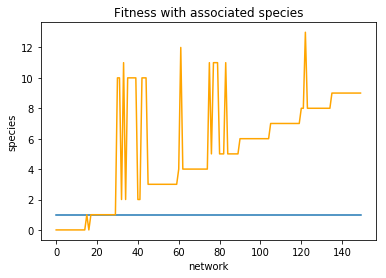

Iteration  14 / 99


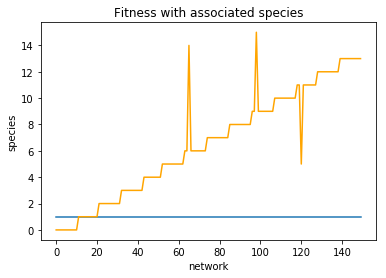

Iteration  15 / 99


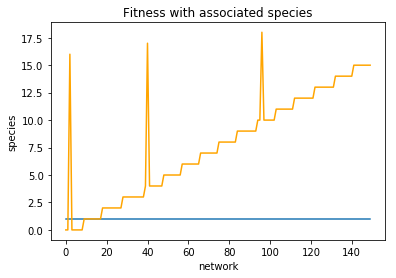

Iteration  16 / 99


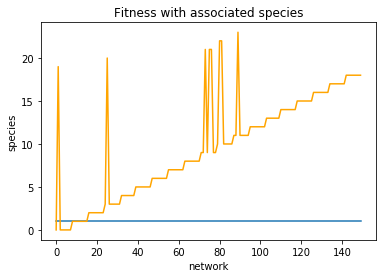

Iteration  17 / 99


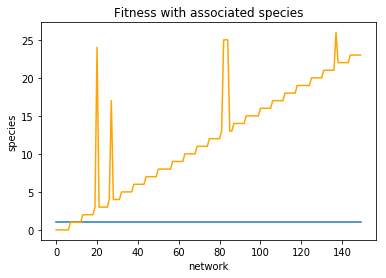

Iteration  18 / 99


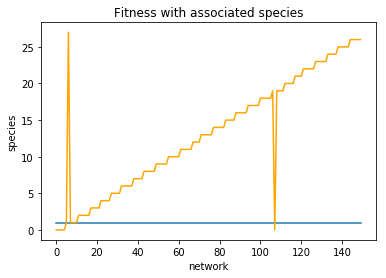

Iteration  19 / 99


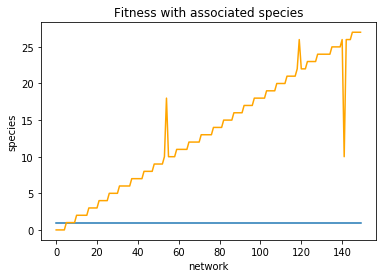

Iteration  20 / 99


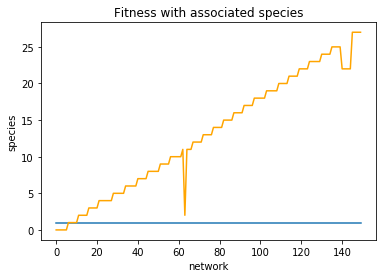

Iteration  21 / 99


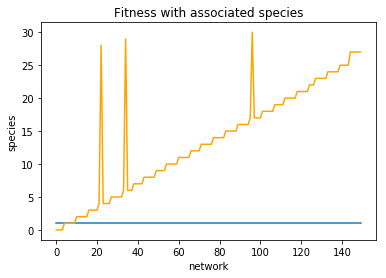

Iteration  22 / 99


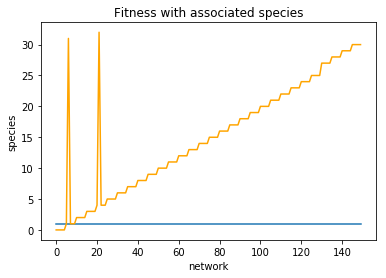

Iteration  23 / 99


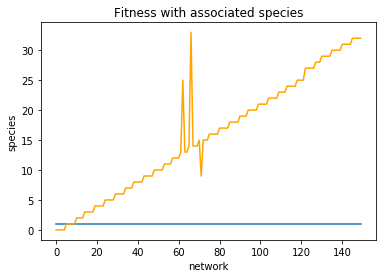

Iteration  24 / 99


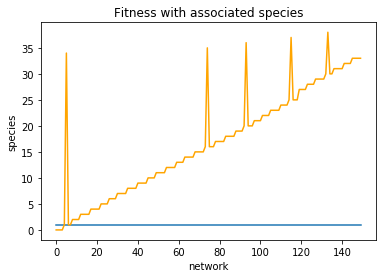

Iteration  25 / 99


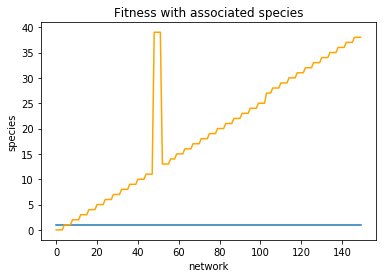

Iteration  26 / 99


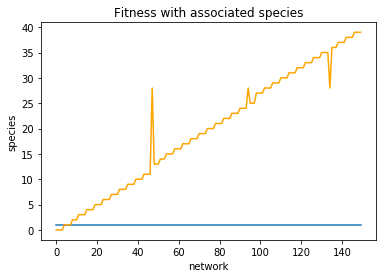

Iteration  27 / 99


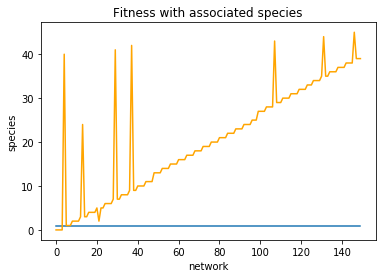

Iteration  28 / 99


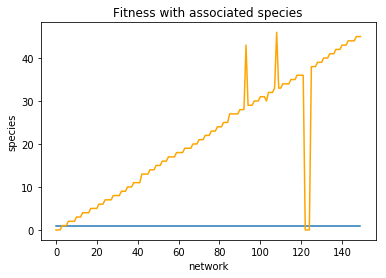

Iteration  29 / 99


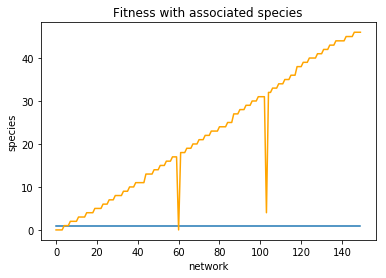

Iteration  30 / 99


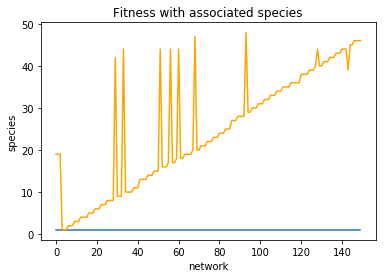

Iteration  31 / 99


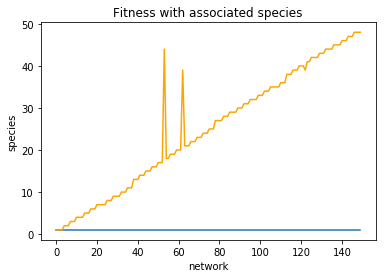

Iteration  32 / 99


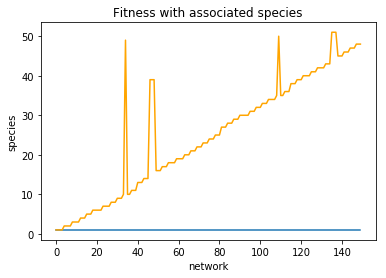

Iteration  33 / 99


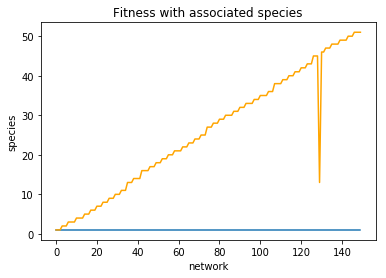

Iteration  34 / 99


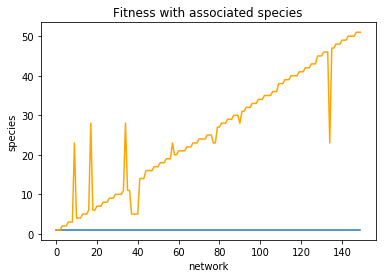

Iteration  35 / 99


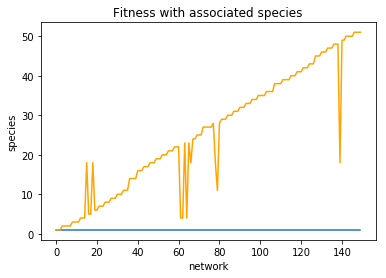

Iteration  36 / 99


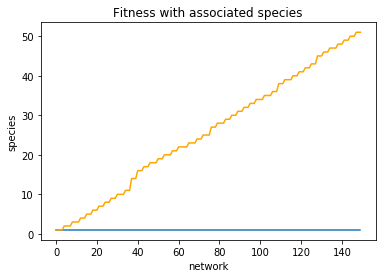

Iteration  37 / 99


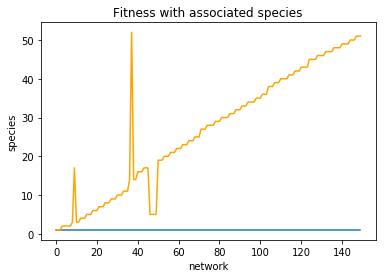

Iteration  38 / 99


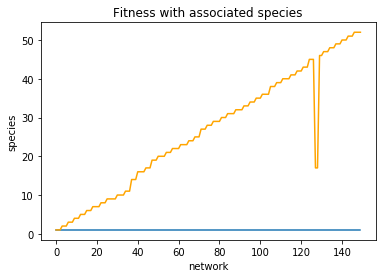

Iteration  39 / 99


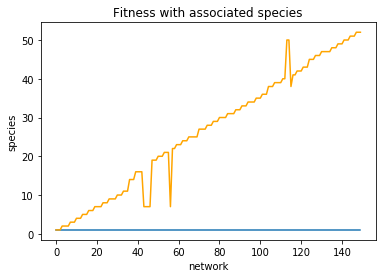

Iteration  40 / 99


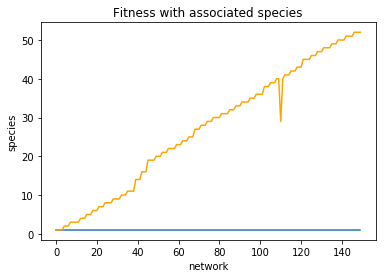

Iteration  41 / 99


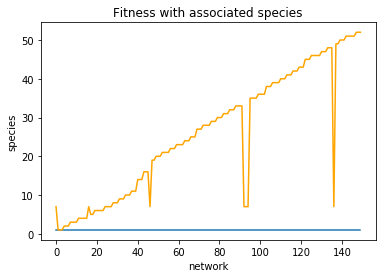

Iteration  42 / 99


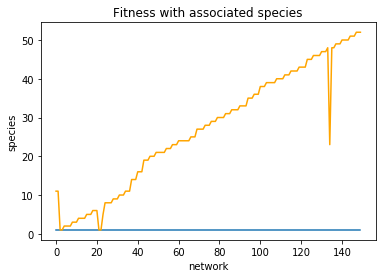

Iteration  43 / 99


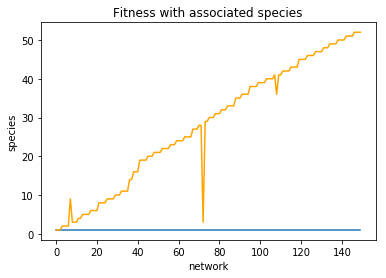

Iteration  44 / 99


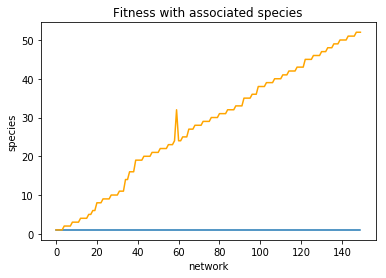

Iteration  45 / 99


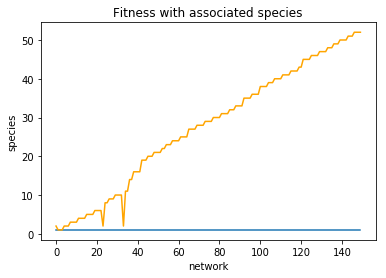

Iteration  46 / 99


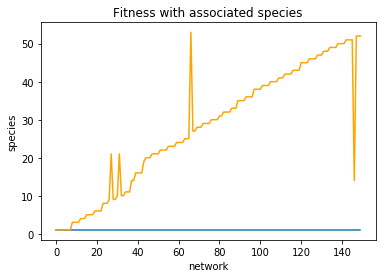

Iteration  47 / 99


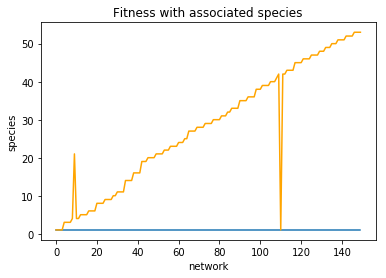

Iteration  48 / 99


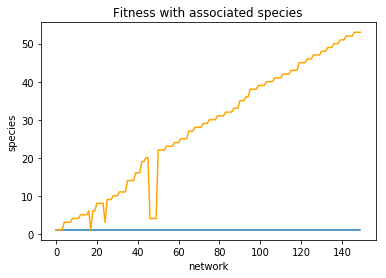

Iteration  49 / 99


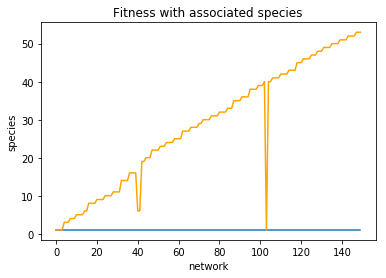

Iteration  50 / 99


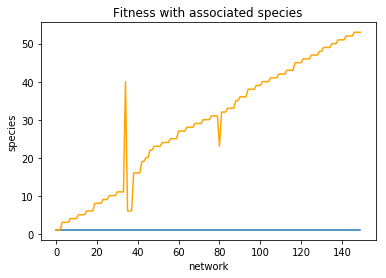

Iteration  51 / 99


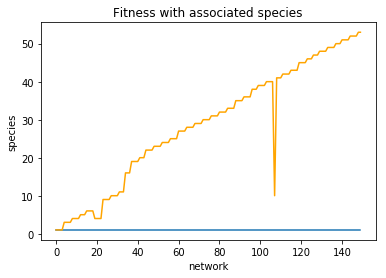

Iteration  52 / 99


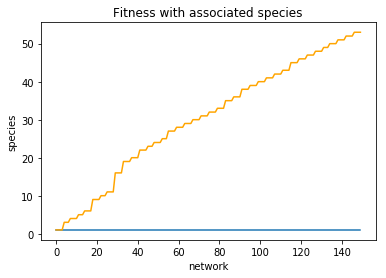

Iteration  53 / 99


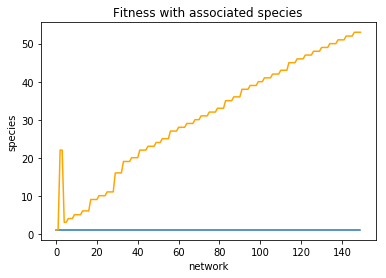

Iteration  54 / 99


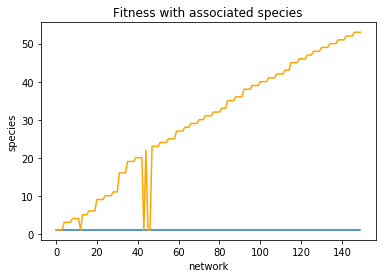

Iteration  55 / 99


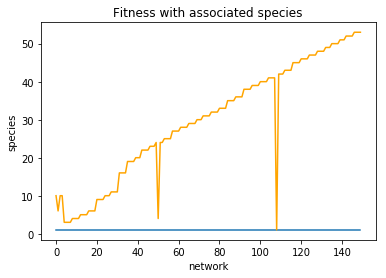

Iteration  56 / 99


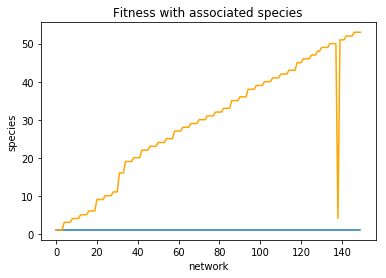

Iteration  57 / 99


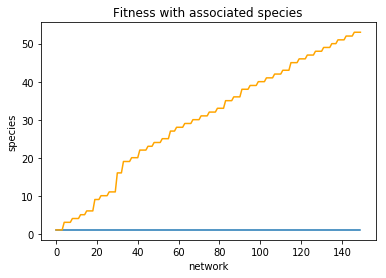

Iteration  58 / 99


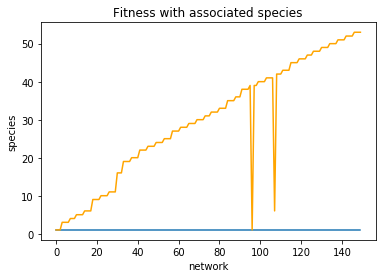

Iteration  59 / 99


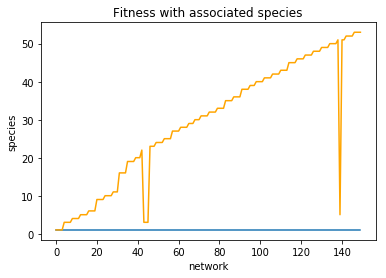

Iteration  60 / 99


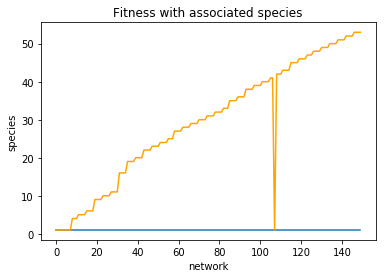

Iteration  61 / 99


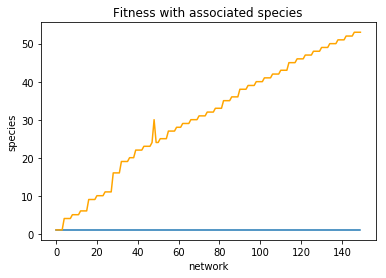

Iteration  62 / 99


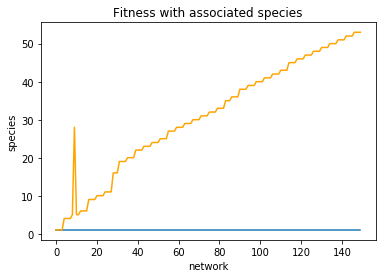

Iteration  63 / 99


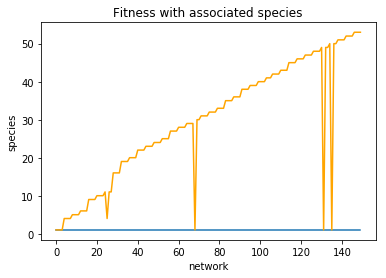

KeyError: 9

In [22]:
# Create population
num_nets = 150
n_inputs = 2
n_outputs = 3
neat = NEAT(num_nets=num_nets, n_inputs=n_inputs, n_outputs=n_outputs)

# Define environment
env = gym.make('MountainCar-v0')

# Time of each trial
T = 500

# Number of iterations for NEAT
epochs = 100
neat.max_shit_gen = epochs + 1 # Update this so that good species do not disappear if there is a fitness limit that cannot be crossed

# Outputs
species = np.zeros((num_nets, epochs))
fitness = np.zeros((num_nets, epochs)) + T+1 # we want positive fitnesses, and here reward is -1 as long as objective is not reached

# Loop over iterations
for epi in range(epochs):
    
    # Save species
    species[:, epi] = neat.species()
    
    # Loop over number of agents
    for n in range(num_nets):
        # Reset environment
        env.reset()
        # We need a continuous update for this one
        observations = []
        # Loop over number of time steps
        for t in range(T):

            # Which action ?
            if t == 0:
                action = env.action_space.sample()
            else:
                #action = np.argmax(neat.action(n, observation))
                action = np.argmax(neat.action(n, observation))
            # Take action
            observation, reward, _, _ = env.step(action) # take a random action
            # Save position on x axis
            observations.append(observation[0])
            # Break if no reward anymore
            if reward == 0:
                break
            else:
                fitness[n, epi] += reward # otherwise add a reward
        # Add observations reward
        observation = max(observations)
        #if 0 < observation:
        #    fitness[n, epi] += observation
    
    # Plot fitness
    print("Iteration ", epi, "/", epochs-1)
    plt.plot(fitness[:, epi])
    plt.plot(species[:, epi]*1, color='orange')
    plt.title('Fitness with associated species')
    plt.xlabel('network')
    plt.ylabel('species')
    plt.show()

    # Modify NEAT if it is not the last generation
    if epi < epochs-1:
        neat.next_gen(fitness[:, epi])
        

### Display evolution of species across training

Text(0, 0.5, 'percentage per species')

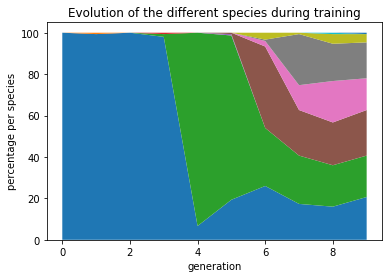

In [126]:
# Number of individuals per species along training
max_spec = int(np.max(species))+1
species_all = np.zeros((species.shape[1], max_spec))
for spec in range(max_spec):
    species_all[:, spec] = np.sum(species==spec, axis=0)
species_all = species_all / species.shape[0] * 100 # normalize number of individuals

# Stackplot to visualize evolution of species
plt.stackplot(np.arange(epochs), species_all.T)
plt.title("Evolution of the different species during training")
plt.xlabel("generation")
plt.ylabel("percentage per species")

### Launch simulation

In [127]:
# Reset environment
env.reset()
# Loop over number of time steps
T = 500
for t in range(T):
    # Display game
    env.render()
    # Which action?
    if t == 0:
        action = env.action_space.sample()
    else:
        action = np.argmax(neat.neat.networks[np.argmax(fitness[:, -1])].update(observation))
    # Take action
    observation, reward, _, _ = env.step(action) # take a random action
    # Break if no reward anymore
    if reward == 0:
        break
    # Wait for a while cause it's too fast
    time.sleep(0)
# Close game
env.close()

In [118]:
env.close()

## Ok that's cool, let's try a more tricky one now: pendulum

The output of the networks is going to be a continuous value now!

### Train algorithm

Iteration  0 / 99


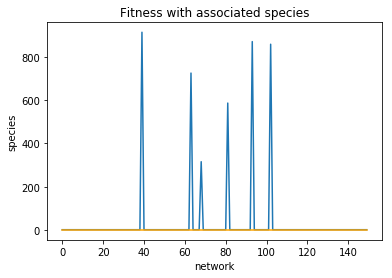

Iteration  1 / 99


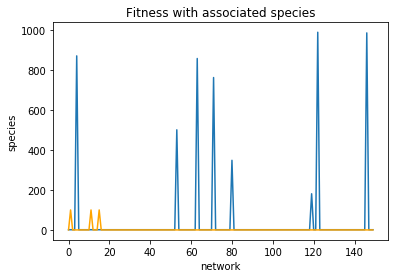

Iteration  2 / 99


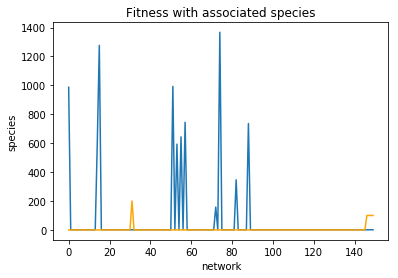

Iteration  3 / 99


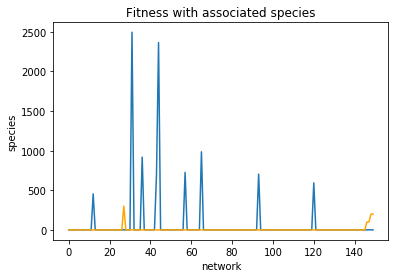

Iteration  4 / 99


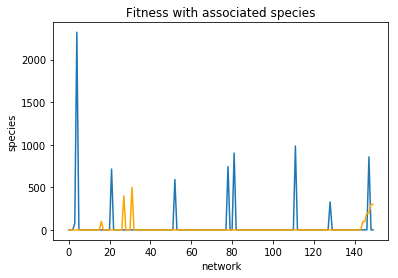

Iteration  5 / 99


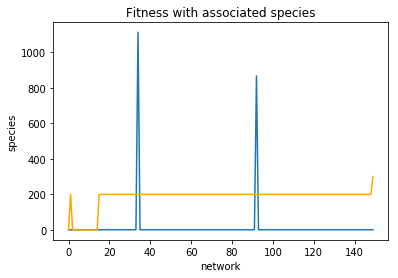

Iteration  6 / 99


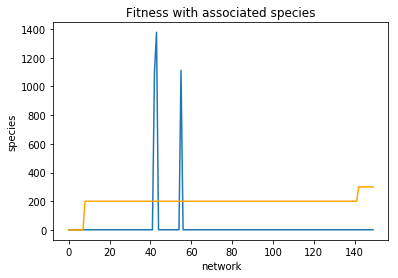

Iteration  7 / 99


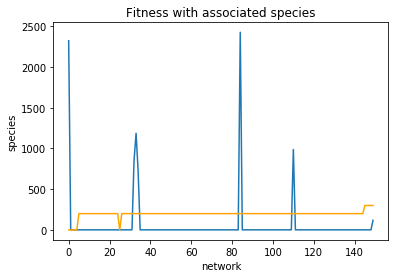

Iteration  8 / 99


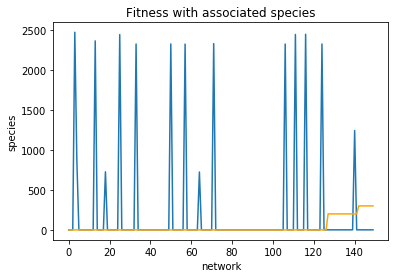

Iteration  9 / 99


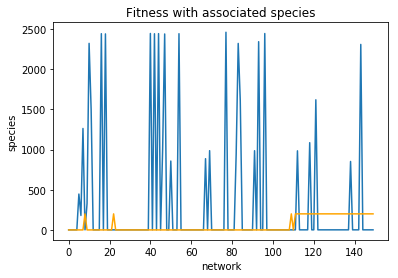

Iteration  10 / 99


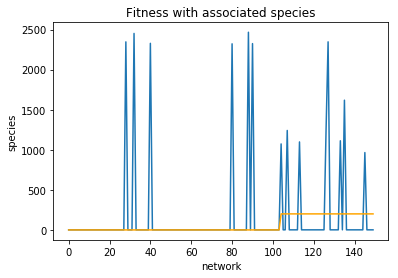

Iteration  11 / 99


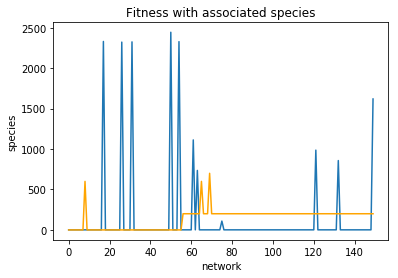

Iteration  12 / 99


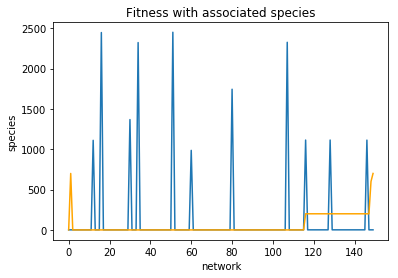

Iteration  13 / 99


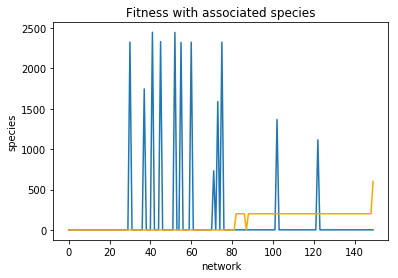

Iteration  14 / 99


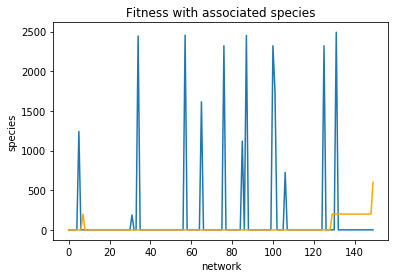

Iteration  15 / 99


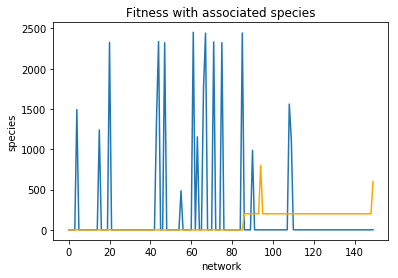

Iteration  16 / 99


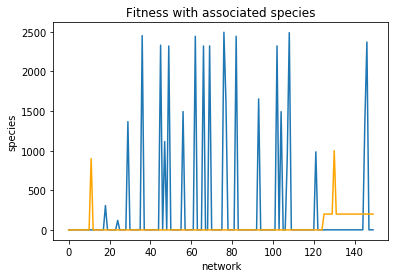

Iteration  17 / 99


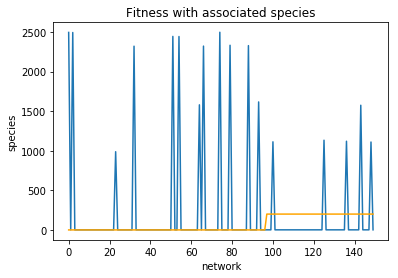

Iteration  18 / 99


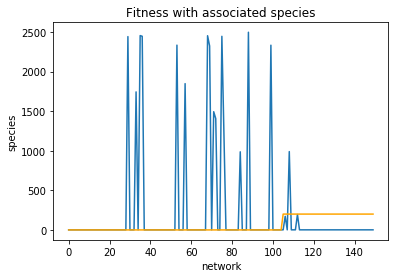

Iteration  19 / 99


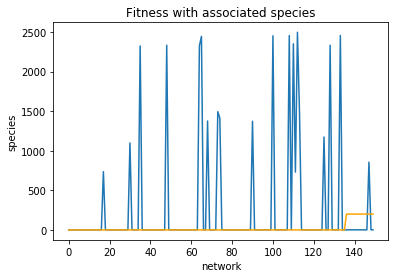

Iteration  20 / 99


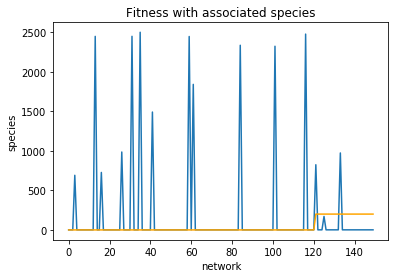

Iteration  21 / 99


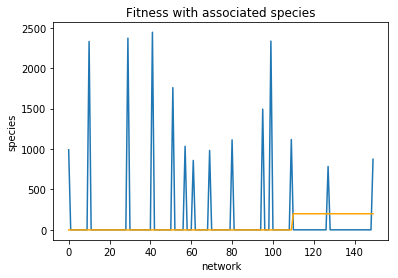

Iteration  22 / 99


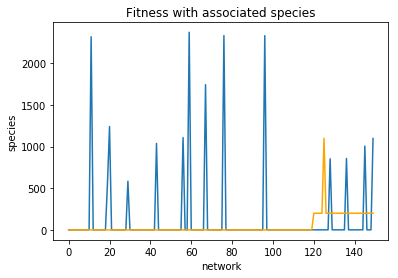

Iteration  23 / 99


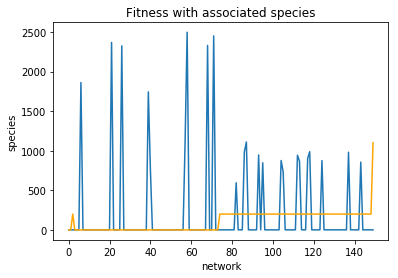

Iteration  24 / 99


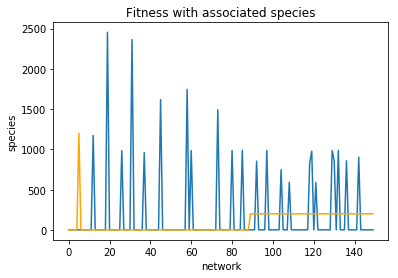

Iteration  25 / 99


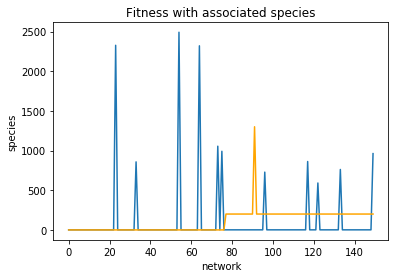

Iteration  26 / 99


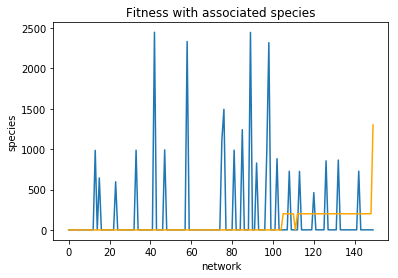

Iteration  27 / 99


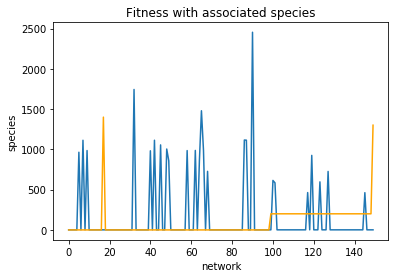

Iteration  28 / 99


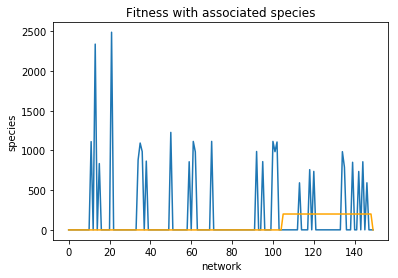

Iteration  29 / 99


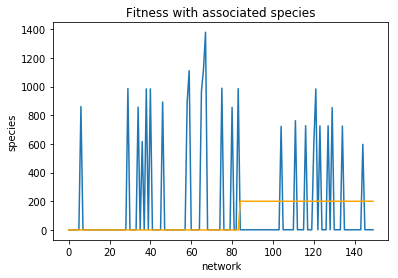

Iteration  30 / 99


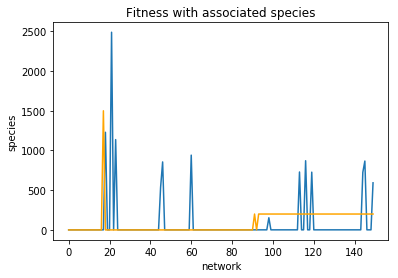

Iteration  31 / 99


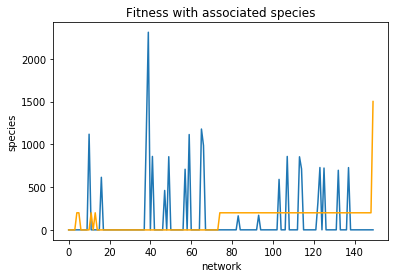

Iteration  32 / 99


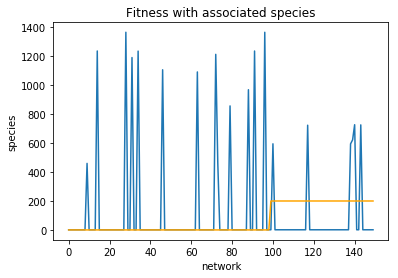

Iteration  33 / 99


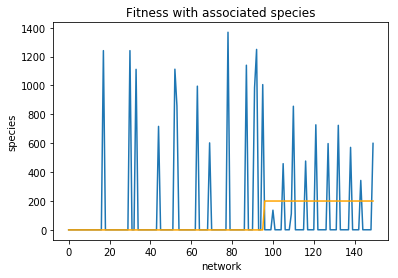

Iteration  34 / 99


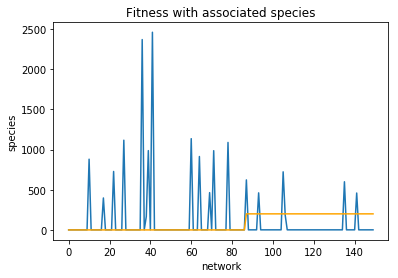

Iteration  35 / 99


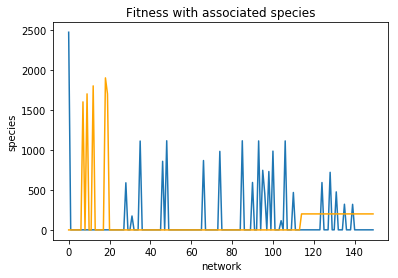

Iteration  36 / 99


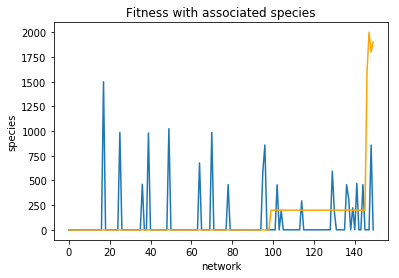

Iteration  37 / 99


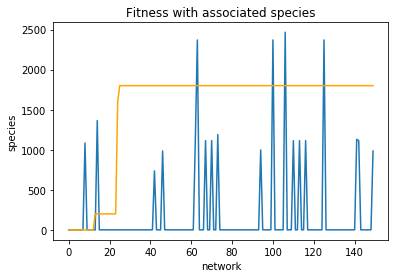

Iteration  38 / 99


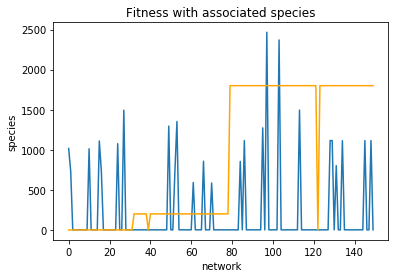

Iteration  39 / 99


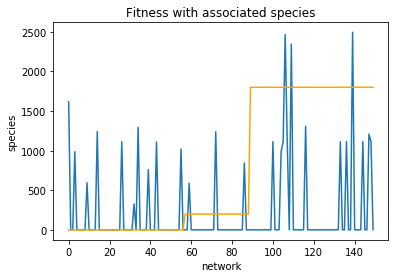

Iteration  40 / 99


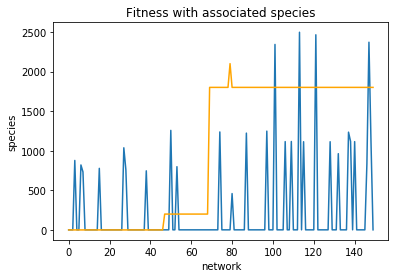

Iteration  41 / 99


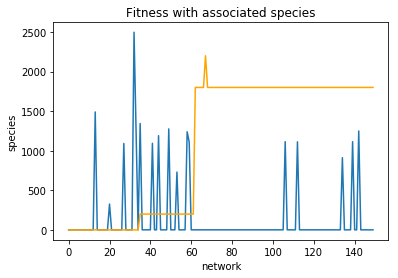

Iteration  42 / 99


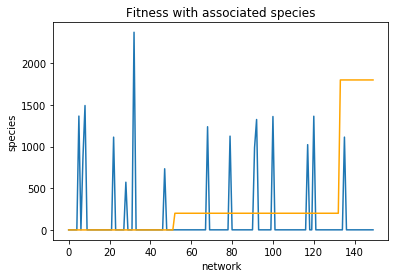

Iteration  43 / 99


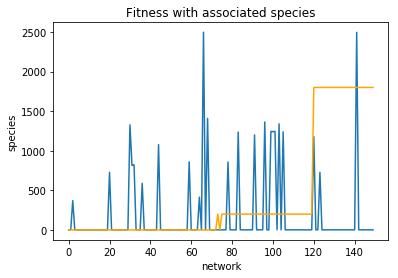

Iteration  44 / 99


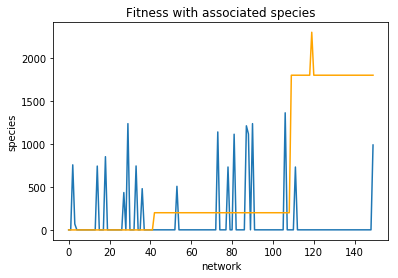

Iteration  45 / 99


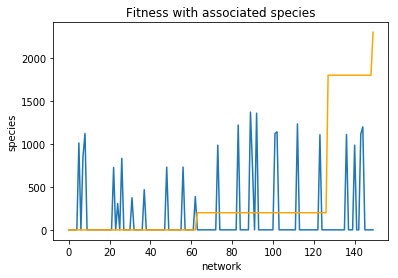

Iteration  46 / 99


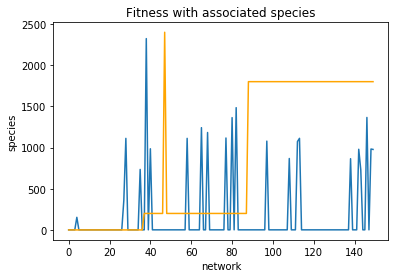

Iteration  47 / 99


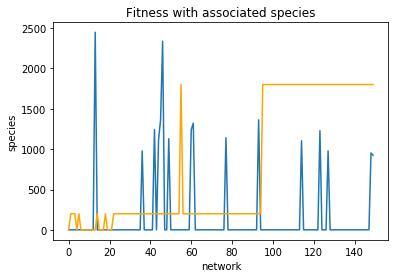

Iteration  48 / 99


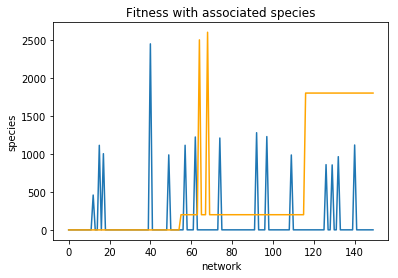

Iteration  49 / 99


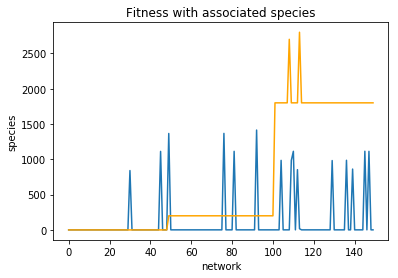

Iteration  50 / 99


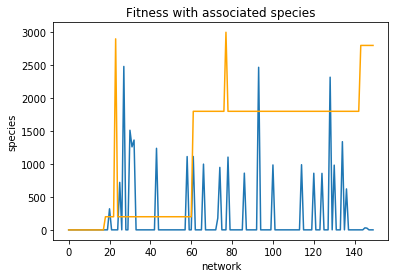

Iteration  51 / 99


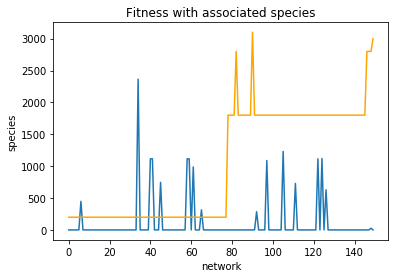

Iteration  52 / 99


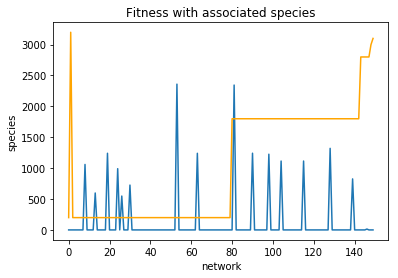

Iteration  53 / 99


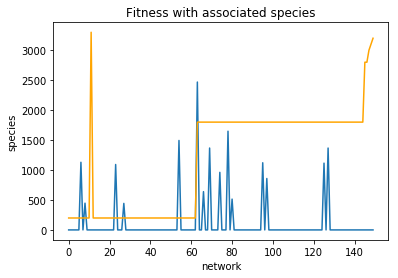

Iteration  54 / 99


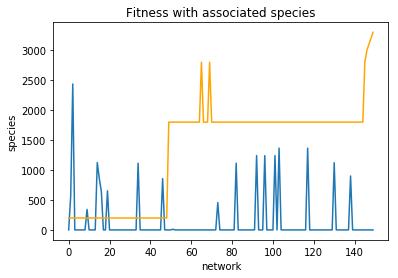

Iteration  55 / 99


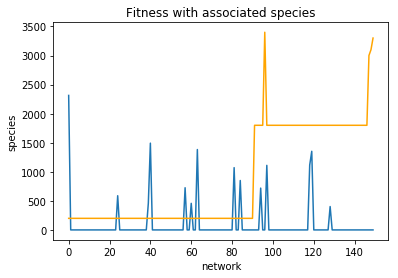

Iteration  56 / 99


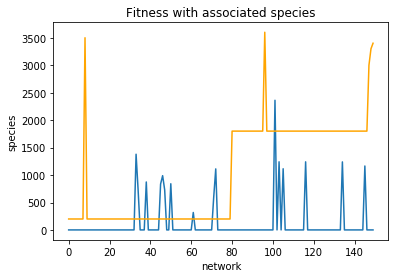

Iteration  57 / 99


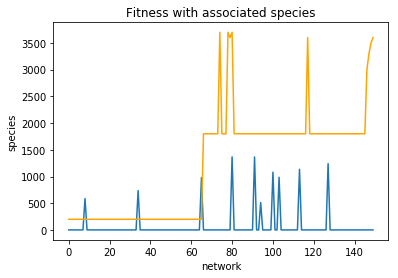

Iteration  58 / 99


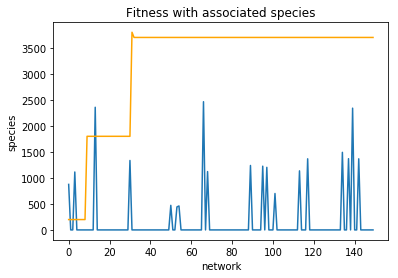

Iteration  59 / 99


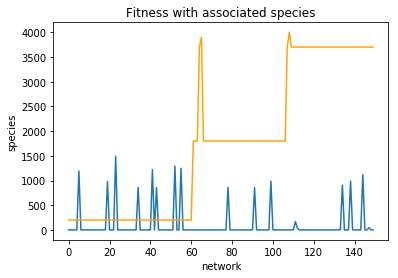

Iteration  60 / 99


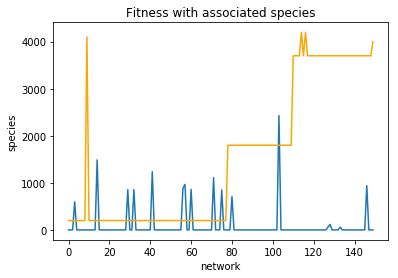

Iteration  61 / 99


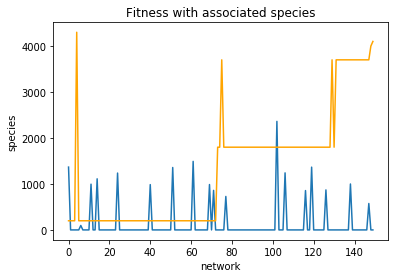

Iteration  62 / 99


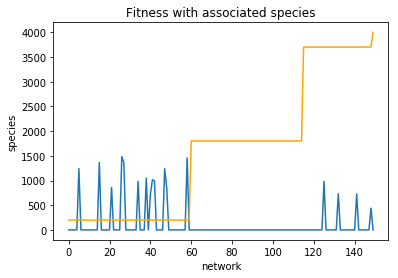

Iteration  63 / 99


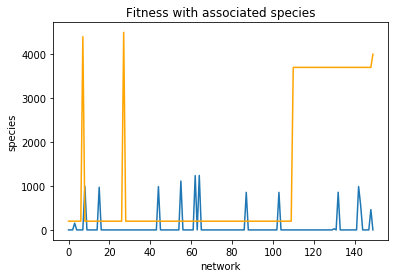

Iteration  64 / 99


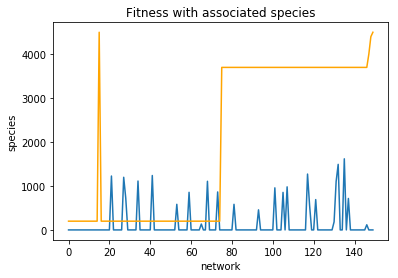

Iteration  65 / 99


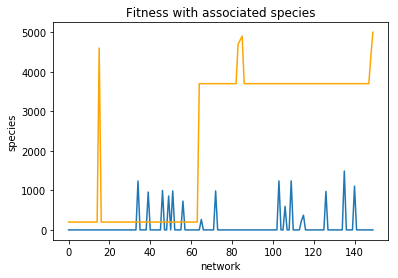

Iteration  66 / 99


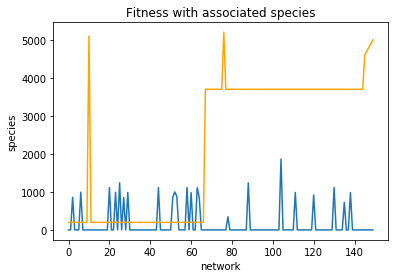

Iteration  67 / 99


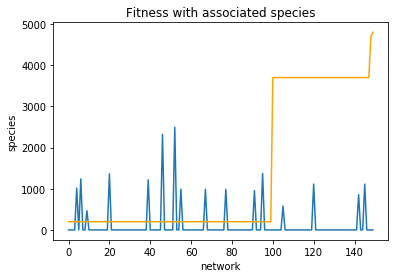

Iteration  68 / 99


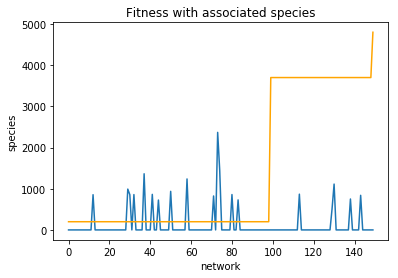

Iteration  69 / 99


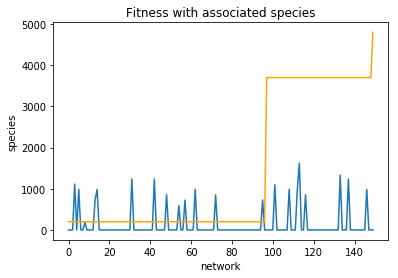

Iteration  70 / 99


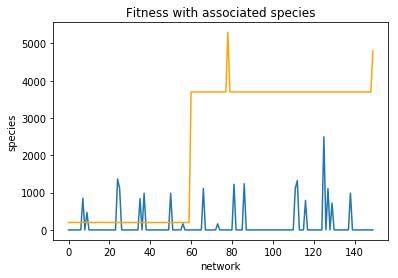

Iteration  71 / 99


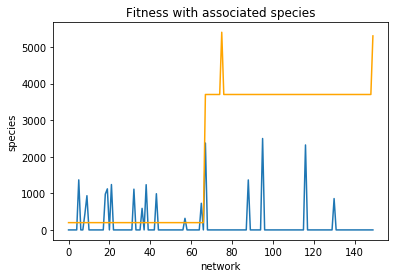

Iteration  72 / 99


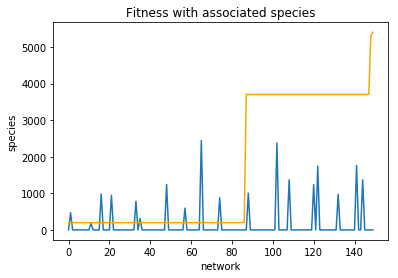

Iteration  73 / 99


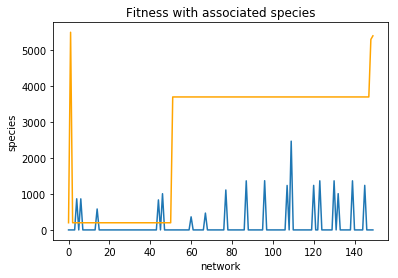

Iteration  74 / 99


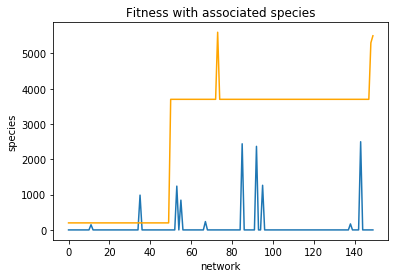

Iteration  75 / 99


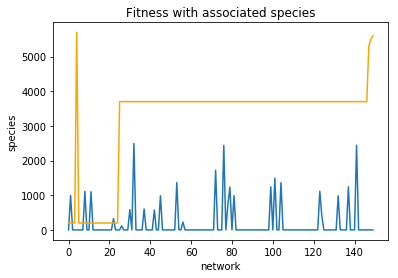

C:\Users\Hippolyte Moulle\Anaconda3\lib\site-packages\gym\envs\classic_control\pendulum.py:102: RuntimeWarning: invalid value encountered in double_scalars
  return (((x+np.pi) % (2*np.pi)) - np.pi)


Iteration  76 / 99


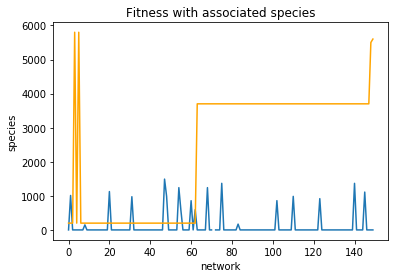

ValueError: cannot convert float NaN to integer

In [19]:
# Create population
num_nets = 150
n_inputs = 3
n_outputs = 1
neat = NEAT(num_nets=num_nets, n_inputs=n_inputs, n_outputs=n_outputs)
# Tanh output, easier for this kind of problem
#for nn in range(num_nets):
#    neat.neat.networks[nn].output_transfer = neat.neat.networks[nn].tanh

# Define environment
env = gym.make('Pendulum-v0', g=9.81)

# Time of each trial
T = 500

# Number of iterations for NEAT
epochs = 100
neat.max_shit_gen = epochs + 1 # Update this so that good species do not disappear if there is a fitness limit that cannot be crossed

# Outputs
species = np.zeros((num_nets, epochs))
fitness = np.zeros((num_nets, epochs))  + T*5 # we want positive fitnesses, and here reward is -1 as long as objective is not reached

# Loop over iterations
for epi in range(epochs):
    
    # Save species
    species[:, epi] = neat.species()
    
    # Loop over number of agents
    for n in range(num_nets):
        # Reset environment
        env.reset()
        # Loop over number of time steps
        for t in range(T):

            # Which action ?
            if t == 0:
                action = env.action_space.sample()
            else:
                action = 2*neat.action(n, observation)
            # Take action
            observation, reward, _, _ = env.step(action) # take a random action
            # Normalize 3rd observation (which is between -8 and 8)
            #observation[2] = observation[2] / 8
            # Break if no reward anymore
            if reward == 0:
                break
            else:
                fitness[n, epi] += reward # otherwise add a reward
    # Adjust fitness
    fitness[fitness[:, epi]<0, epi] = 1 # we don't want an array of zeros
    
    # Plot fitness
    print("Iteration ", epi, "/", epochs-1)
    plt.plot(fitness[:, epi])
    plt.plot(species[:, epi]*100, color='orange')
    plt.title('Fitness with associated species')
    plt.xlabel('network')
    plt.ylabel('species')
    plt.show()

    # Modify NEAT if it is not the last generation
    if epi < epochs-1:
        neat.next_gen(fitness[:, epi])
        

In [20]:
fitness[:, epi]

array([1.00000000e+00, 1.01177093e+03, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.49220244e+02, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.12628223e+03, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 9.75267186e+02,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.49176430e+03,
       9.89839836e+02, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.24113912e+03, 5.79456660e+02,
      

### Display evolution of species across training

Text(0, 0.5, 'percentage per species')

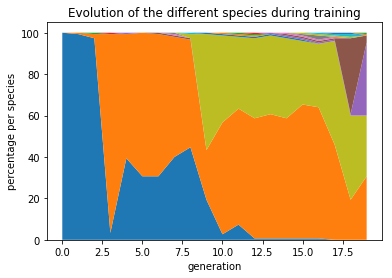

In [13]:
# Number of individuals per species along training
max_spec = int(np.max(species))+1
species_all = np.zeros((species.shape[1], max_spec))
for spec in range(max_spec):
    species_all[:, spec] = np.sum(species==spec, axis=0)
species_all = species_all / species.shape[0] * 100 # normalize number of individuals

# Stackplot to visualize evolution of species
plt.stackplot(np.arange(epochs), species_all.T)
plt.title("Evolution of the different species during training")
plt.xlabel("generation")
plt.ylabel("percentage per species")

### Launch simulation

In [18]:
# Reset environment
env.reset()
# Loop over number of time steps
T = 250
for t in range(T):
    # Display game
    env.render()
    if t == 0:
        time.sleep(0)
    # Which action?
    if t == 0:
        action = env.action_space.sample()
    else:
        action = 4*neat.neat.networks[np.argmax(fitness[:, -1])].update(observation)-2
    # Take action
    observation, reward, _, _ = env.step(action) # take a random action
    # Break if no reward anymore
    if reward == 0:
        break
    # Wait for a while cause it's too fast
    time.sleep(0)
# Close game
env.close()

In [18]:
neat.neat.networks[np.argmax(fitness[:, -1])].genes

[[0, 4, 5.083481268251536, True, 0],
 [1, 4, -6.514916979770106, True, 1],
 [2, 4, -3.7311196437959486, True, 2],
 [3, 4, -2.530549357785778, True, 3],
 [4, 4, 1.5176500322441648, True, 4],
 [3, 6, 1, True, 7],
 [6, 4, 0.8561162874937598, True, 8]]

In [104]:
# Create population
num_nets = 150
n_inputs = 3
n_outputs = 1
neat = NEAT(num_nets=num_nets, n_inputs=n_inputs, n_outputs=n_outputs)

In [105]:
neat.neat.networks[0].sigmoid(1)

0.9926084586557181

In [5]:
# Create population
num_nets = 150
n_inputs = 3
n_outputs = 1
neat = NEAT(num_nets=num_nets, n_inputs=n_inputs, n_outputs=n_outputs)
for nn in range(num_nets):
    neat.neat.networks[nn].output_transfer = neat.neat.networks[nn].tanh
    action = neat.action(nn, [1, 1, 1])
    print(action)

[0.9223711]
[-0.99998844]
[-0.97937546]
[-0.16300111]
[0.7078116]
[-0.79473036]
[0.99999987]
[-0.9993218]
[-0.99997988]
[0.99999994]
[-0.99993499]
[0.99792533]
[-0.99999672]
[-1.]
[-0.99952846]
[-0.99998825]
[0.99999152]
[0.89197445]
[0.98901795]
[-0.99997461]
[0.3998994]
[-0.99999964]
[0.27223383]
[-0.99999949]
[-0.99996479]
[-0.84931402]
[0.37357056]
[-0.9664286]
[1.]
[-0.99851113]
[-0.99936984]
[-0.99907988]
[-0.20578818]
[-0.05657983]
[-0.9982294]
[0.99989983]
[0.99577732]
[0.91183183]
[0.88772517]
[0.99827332]
[0.98355004]
[-0.99639292]
[-0.99853465]
[-1.]
[-0.99999972]
[-0.99999566]
[0.99999626]
[0.99995033]
[0.99994605]
[-0.99999996]
[0.99999937]
[-0.9999956]
[-0.9996426]
[0.98793662]
[0.99097309]
[0.90335444]
[-0.99999994]
[0.99999997]
[0.9938855]
[0.7939701]
[0.88194672]
[-0.71069532]
[-0.99998994]
[-0.99960244]
[0.99990435]
[-0.32952245]
[-0.99924926]
[0.99438517]
[-0.95542646]
[0.43037406]
[-0.99762046]
[0.99997855]
[-0.94495469]
[-0.99996011]
[0.56105405]
[0.96849974]
[-0.9

# Games tester part

Total reward is  -2652.191591678559
[array([ 0.80484128, -0.59349012, -1.45893226]), array([ 0.74429089, -0.66785558, -1.91871077]), array([ 0.6692072 , -0.74307585, -2.1266216 ]), array([ 0.57349414, -0.81920966, -2.44753159]), array([ 0.4394677 , -0.8982584 , -3.11517583]), array([ 0.25313253, -0.96743161, -3.98178224]), array([ 0.01092126, -0.99994036, -4.89990802]), array([-0.26487926, -0.96428159, -5.58000371]), array([-0.54667569, -0.83734442, -6.20620607]), array([-0.78790609, -0.61579541, -6.58024439]), array([-0.95485125, -0.2970843 , -7.23514925]), array([-0.99820514,  0.05988732, -7.23121609]), array([-0.91479473,  0.40391905, -7.11747437]), array([-0.7366079 ,  0.67632004, -6.53916799]), array([-0.49490869,  0.86894499, -6.20622583]), array([-0.23003533,  0.97318228, -5.71231527]), array([ 0.01437327,  0.9998967 , -4.92975487]), array([ 0.2330601 ,  0.97246233, -4.41699002]), array([ 0.41853774,  0.90819941, -3.93222788]), array([ 0.55028644,  0.83497595, -3.01745202]), arr

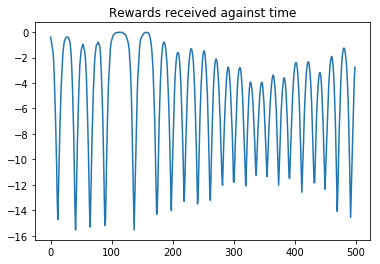

In [7]:
# Define environment
env = gym.make('Pendulum-v0', g=9.81)
# Reset environment
env.reset()
# Save rewards
observations = []
rewards = []
# Loop over number of time steps
T = 500
for t in range(T):
    # Display game
    env.render()
    # Which action?
    action = env.action_space.sample()
    # Take action
    observation, reward, _, _ = env.step(action) # take a random action
    # Save reward
    observations.append(observation)
    rewards.append(reward)
    # Break if no reward anymore
    if reward == 0:
        break
# Close game
env.close()
# Print infos
print("Total reward is ", sum(rewards))
plt.plot(rewards)
plt.title("Rewards received against time")
print(observations)

In [112]:
observations[0]

-0.43184650478541514